<a href="https://colab.research.google.com/github/DuduVS/Curso_Machine_Learning/blob/master/spotify_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [120]:
data = pd.read_csv('/content/drive/My Drive/Curso - ML/datasets/top10s.csv', encoding='ISO-8859-1')

Source: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

Dataset: top songs do spotify de 2010-2019.

Objetivo: tentar entender quais características afetam a popularidade de uma música.


Sobre o dataset:

    Genre - the genre of the track
    Year - the release year of the recording.
    Added - the earliest date you added the track to your collection.
    Beats Per Minute (BPM) - The tempo of the song.
    Energy - The energy of a song - the higher the value, the more energtic the song.
    Danceability - The higher the value, the easier it is to dance to this song.
    Loudness (dB) - The higher the value, the louder the song.
    Liveness - The higher the value, the more likely the song is a live recording.
    Valence - The higher the value, the more positive mood for the song.
    Length - The duration of the song.
    Acousticness - The higher the value the more acoustic the song is.
    Speechiness - The higher the value the more spoken word the song contains.
    Popularity - The higher the value the more popular the song is.
    Duration - The length of the song.



In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


# Pré-análise

Renomeação dos atributos.

In [124]:
data.rename(columns={'Unnamed: 0': 'id', 'top genre':'genre', 'nrgy':'energy', 'dnce':'danceability', 
                     'dB':'loudness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                     'spch':'speechiness','pop':'popularity'}, inplace=True)

In [125]:
data.head(10)

,id,title,artist,genre,year,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [126]:
data = data.dropna()

Alguma observações.

In [127]:
data['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: genre, dtype: int64

Pop, especialmente dance pop, é de longe o gênero mais popular. 

In [128]:
data['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Ed Sheeran          11
The Chainsmokers    11
Pitbull             11
Shawn Mendes        11
Name: artist, dtype: int64

Katy Perry possui o maior número de músicas no top.

# Pré-processamento

Remoção de atributos categóricos. 

In [129]:
data = data.drop(columns=['id', 'title', 'artist', 'year', 'genre'])

In [130]:
data.head(10)

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78
5,65,86,73,-5,11,54,214,4,14,77
6,120,78,75,-4,4,82,203,0,9,77
7,148,76,52,-6,12,38,225,7,4,77
8,93,37,48,-8,12,14,216,74,3,76
9,126,72,79,-4,7,61,235,13,4,73


# Análise

In [131]:
data.describe()

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


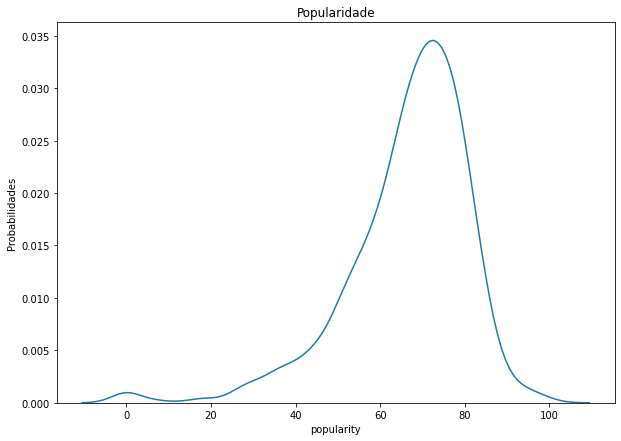

In [136]:
fig = plt.figure(figsize=(10, 7))
sns.distplot(data.popularity, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Popularidade')
plt.show()

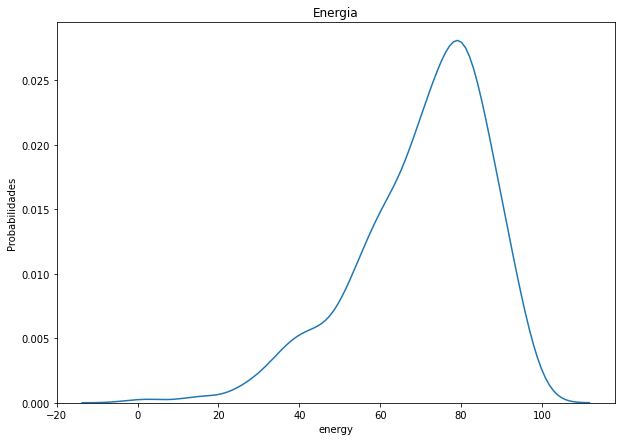

In [138]:
fig = plt.figure(figsize=(10, 7))
sns.distplot(data.energy, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.title('Energia')
plt.show()

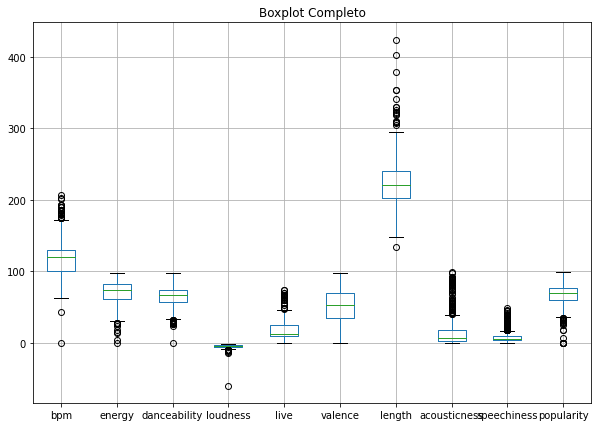

In [115]:
fig = plt.figure(figsize=(10, 7))
data.boxplot()
plt.title('Boxplot Completo')
plt.show()

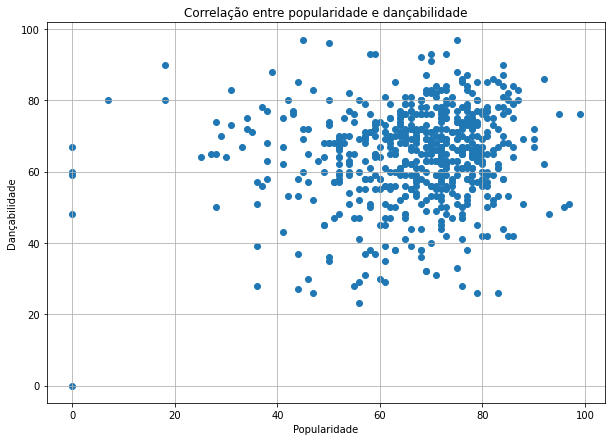

Correlação: 0.11605444461442103


In [109]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(data.popularity, data.danceability)
plt.xlabel('Popularidade')
plt.ylabel('Dançabilidade')
plt.title('Correlação entre popularidade e dançabilidade')
plt.grid(True)
plt.show()

print(f"Correlação: {data['popularity'].corr(data['danceability'])}")

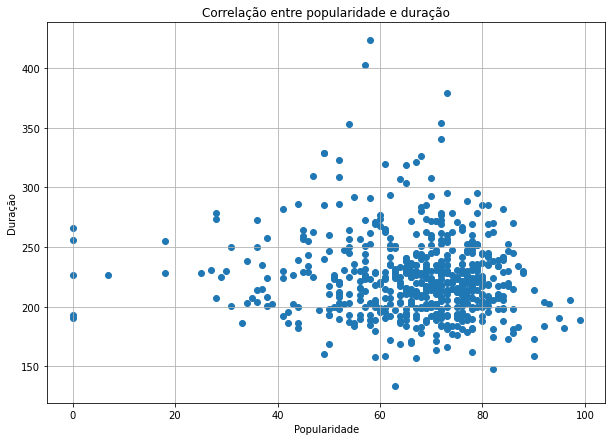

Correlação: -0.10436275315485516


In [110]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(data.popularity, data.length)
plt.xlabel('Popularidade')
plt.ylabel('Duração')
plt.title('Correlação entre popularidade e duração')
plt.grid(True)
plt.show()

print(f"Correlação: {data['popularity'].corr(data['length'])}")

In [94]:
corr = data.corr()

In [95]:
corr

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
bpm,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
energy,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
danceability,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
loudness,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
valence,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
length,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acousticness,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
speechiness,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490
popularity,0.018983,-0.057645,0.116054,0.156897,-0.075749,0.038953,-0.104363,0.026704,-0.041490,1.000000


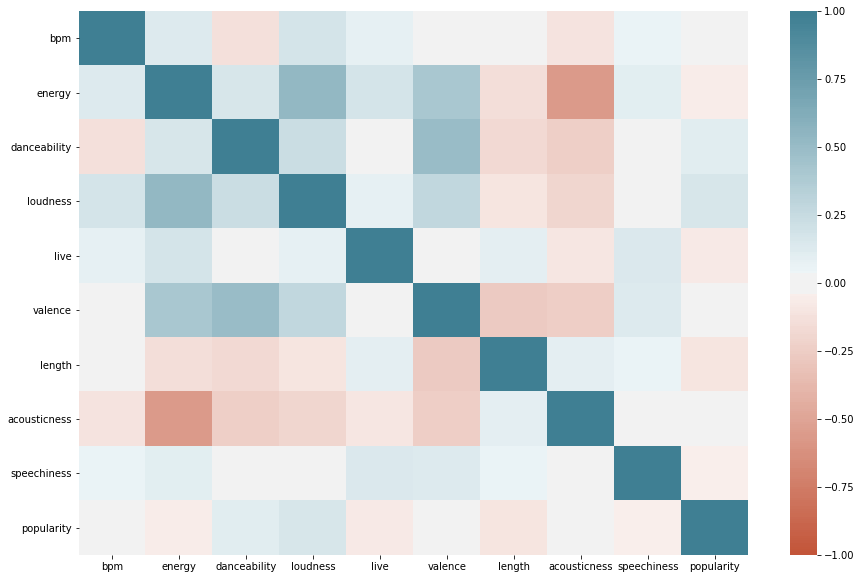

In [105]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

Observações sobre as correlacões dos atributos entre si e com a popularidade:

A energia da música tem considerável correlação positiva com a volume e com a positividade, e correlação negativa com a acusticidade. A dançabilidade também aumenta conforme a positividade.

Poucos atributos afetam diretamente a popularidade, porém pode-se observar que as músicas mais populares tendem a ser mais curtas e serem mais altas/"dançáveis".


